In [1]:
cd ..

f:\Studium\ProbModels\rl-4-self-repair


In [2]:
import time
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from envs.broken_components import BrokenComponentsEnv
from envs.broken_components_ctmc import BrokenComponentsCTMCEnv
from envs.data_handler import DataHandler
from IPython.display import clear_output
from data.transition_matrix.hmm_trace import HMMTrace
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit as curve_fit
import pandas as pd

In [3]:
trace = HMMTrace()
# trace.create_approx_transmat()
# trace.write_transition_matrix('data/transition_matrix/transition_matrix_approx.csv')

In [85]:
time_samples = [[[] for col in range(19 * 3)] for row in range(19 * 3)]
for i in range(20):
    samples = trace.time_samples(10000)
    for orig, dest, time in samples:
        time_samples[orig][dest].append(time)

325.8190645232318


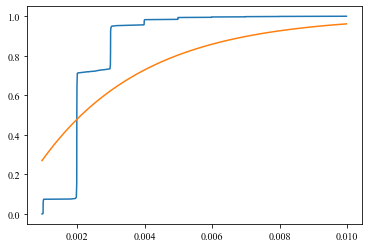

In [103]:
rates = [[-1 for col in range(19 * 3)] for row in range(19 * 3)]
for i in range(len(time_samples)):
    for j in range(len(time_samples[i])):
            samples = sorted(time_samples[i][j])
            length = len(samples)
            if length == 0:
                rates[i][j] = 0
                continue
            if length == 1:
                rates[i][j] = samples[0]
                continue            
            num_range = [samples[0], samples[-1]]
            x = np.array([])
            y = np.array([])
            for k in range(length):
                x = np.append(x, samples[k])
                y = np.append(y, k / length)
            opt = curve_fit(lambda t, a: 1.0 - np.exp(-a * t), x, y)
            lam = opt[0][0]
            compare_x = np.array([])
            compare_y = np.array([])
            num_samples = 100
            for k in range(num_samples):
                x_sample = num_range[0] + (num_range[1] - num_range[0]) * k / (num_samples - 1)
                y_sample = 1.0 - np.exp(-lam * x_sample)
                compare_x = np.append(compare_x, x_sample)
                compare_y = np.append(compare_y, y_sample)
            if i == 0 and j == 36:
                print(lam)
                plt.plot(x, y)
                plt.plot(compare_x, compare_y)
            rates[i][j] = lam
# print(rates)

346.68473417340283


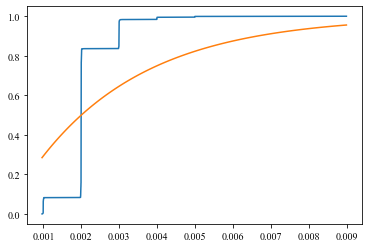

In [4]:
trace.create_transition_rate_matrix(20, 10000)

In [5]:
trace.write_transition_rate_matrix('data/transition_matrix/transition_rate_matrix_approx.csv')

In [3]:
dh = DataHandler(transition_matrix_path='data/transition_matrix/transition_matrix_approx.csv')
broken_components = dh.get_sample_component_failure_pairs(5)
broken_components

[('_SFMQK-cdEeet0YmmfbMwkw', 'CF3'),
 ('_SFJyq-cdEeet0YmmfbMwkw', 'CF3'),
 ('_SE7IwecdEeet0YmmfbMwkw', 'CF1'),
 ('_SE_aYOcdEeet0YmmfbMwkw', 'CF1'),
 ('_SEz0XOcdEeet0YmmfbMwkw', 'CF1')]

## Environment

In [7]:
# possible reward_modus 'raw', 'sqt', 'log10', 'cube'
env = BrokenComponentsEnv(broken_components, reward_modus='raw', reward_decrease=True, reward_decrease_factor=0.99, state_as_vec=True, hidden_states=True, transition_matrix_path='data/transition_matrix/transition_matrix_approx.csv')
# env = BrokenComponentsEnv(broken_components, reward_modus='raw', reward_decrease=True, reward_decrease_factor=0.99, state_as_vec=False)

In [4]:
env = BrokenComponentsCTMCEnv(broken_components, reward_modus='raw', reward_decrease=True, reward_decrease_factor=0.99, state_as_vec=True, hidden_states=True, transition_rate_matrix_path='data/transition_matrix/transition_rate_matrix_approx.csv')

In [5]:
trans = env.data_handler.transition
axes = trans.transition_rate_matrix.axes
rows = axes[0]
columns = axes[1]
print(sum(trans.transition_matrix.iloc[3, 1:(len(columns) - 1)].values.tolist()))
trans.write_embedded_DTMC('data/transition_matrix/embedded_dtmc_transition_matrix.csv')

0.9999999999999999


In [6]:
embedded = pd.read_csv('data/transition_matrix/embedded_dtmc_transition_matrix.csv')
embedded

NameError: name 'pd' is not defined

### Env properties

In [6]:
n_actions = env.action_space.n
n_actions

5

In [5]:
env.hidden_space_dict

{'_SFKaeecdEeet0YmmfbMwkw': 'operational',
 '_SFLBxecdEeet0YmmfbMwkw': 'degraded',
 '_SEuUbecdEeet0YmmfbMwkw': 'operational',
 '_SFOFUOcdEeet0YmmfbMwkw': 'operational',
 '_SEx-rucdEeet0YmmfbMwkw': 'operational'}

In [7]:
n_states = env.observation_space.n
n_states

32

In [8]:
env.action_space_names

array([('_SFJyC-cdEeet0YmmfbMwkw', 'CF3'),
       ('_SFHWA-cdEeet0YmmfbMwkw', 'CF2'),
       ('_SE-z0OcdEeet0YmmfbMwkw', 'CF3'),
       ('_SFOFSucdEeet0YmmfbMwkw', 'CF3'),
       ('_SE-zOOcdEeet0YmmfbMwkw', 'CF1')], dtype=object)

In [9]:
env.observation_space_names

[array([('_SFJyC-cdEeet0YmmfbMwkw', 'CF3'),
        ('_SFHWA-cdEeet0YmmfbMwkw', 'CF2'),
        ('_SE-z0OcdEeet0YmmfbMwkw', 'CF3'),
        ('_SFOFSucdEeet0YmmfbMwkw', 'CF3'),
        ('_SE-zOOcdEeet0YmmfbMwkw', 'CF1')], dtype=object),
 array([('_SFJyC-cdEeet0YmmfbMwkw', 'CF3'),
        ('_SFHWA-cdEeet0YmmfbMwkw', 'CF2'),
        ('_SE-z0OcdEeet0YmmfbMwkw', 'CF3'),
        ('_SFOFSucdEeet0YmmfbMwkw', 'CF3')], dtype=object),
 array([('_SFJyC-cdEeet0YmmfbMwkw', 'CF3'),
        ('_SFHWA-cdEeet0YmmfbMwkw', 'CF2'),
        ('_SE-z0OcdEeet0YmmfbMwkw', 'CF3'),
        ('_SE-zOOcdEeet0YmmfbMwkw', 'CF1')], dtype=object),
 array([('_SFJyC-cdEeet0YmmfbMwkw', 'CF3'),
        ('_SFHWA-cdEeet0YmmfbMwkw', 'CF2'),
        ('_SE-z0OcdEeet0YmmfbMwkw', 'CF3')], dtype=object),
 array([('_SFJyC-cdEeet0YmmfbMwkw', 'CF3'),
        ('_SFHWA-cdEeet0YmmfbMwkw', 'CF2'),
        ('_SFOFSucdEeet0YmmfbMwkw', 'CF3'),
        ('_SE-zOOcdEeet0YmmfbMwkw', 'CF1')], dtype=object),
 array([('_SFJyC-cdEeet0YmmfbMwkw', 'CF3

### Examples

#### Example 1

In [16]:
env.reset(reward_modus='raw') # possible reward_modus 'raw', 'sqt', 'log10', 'cubic'
env.render()

action = env.action_space.sample()
state, reward, done, _ = env.step(action)
print(state, reward, done)
env.render()

action = env.action_space.sample()
state, reward, done, _ = env.step(action)
print(state, reward, done)
env.render()

action = env.action_space.sample()
state, reward, done, _ = env.step(action)
print(state, reward, done)
env.render()

Steps:  0
Action:  None
Successful:  None
State:  [('_SE6h_ecdEeet0YmmfbMwkw', 'CF1'), ('_SEwwp-cdEeet0YmmfbMwkw', 'CF2'), ('_SFM1rOcdEeet0YmmfbMwkw', 'CF2'), ('_SE8W-ecdEeet0YmmfbMwkw', 'CF1'), ('_SFS9IOcdEeet0YmmfbMwkw', 'CF3')] 


[1. 1. 1. 1. 1.] 0.0 False
Steps:  1
Action:  ('_SEwwp-cdEeet0YmmfbMwkw', 'CF2')
Successful:  False
State:  [('_SE6h_ecdEeet0YmmfbMwkw', 'CF1'), ('_SEwwp-cdEeet0YmmfbMwkw', 'CF2'), ('_SFM1rOcdEeet0YmmfbMwkw', 'CF2'), ('_SE8W-ecdEeet0YmmfbMwkw', 'CF1'), ('_SFS9IOcdEeet0YmmfbMwkw', 'CF3')] 


[1. 1. 1. 0. 1.] 17.15175 False
Steps:  2
Action:  ('_SE8W-ecdEeet0YmmfbMwkw', 'CF1')
Successful:  True
State:  [('_SE6h_ecdEeet0YmmfbMwkw', 'CF1'), ('_SEwwp-cdEeet0YmmfbMwkw', 'CF2'), ('_SFM1rOcdEeet0YmmfbMwkw', 'CF2'), ('_SFS9IOcdEeet0YmmfbMwkw', 'CF3')] 


[1. 1. 1. 0. 1.] 0.0 False
Steps:  3
Action:  ('_SEwwp-cdEeet0YmmfbMwkw', 'CF2')
Successful:  False
State:  [('_SE6h_ecdEeet0YmmfbMwkw', 'CF1'), ('_SEwwp-cdEeet0YmmfbMwkw', 'CF2'), ('_SFM1rOcdEeet0YmmfbMwkw', 'CF2'

#### Example 2

In [17]:
env.reset('raw') # possible reward_modus 'raw', 'sqt', 'log10', 'cube'
accumulated_reward = 0
episode_done = False

while(not episode_done):
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    accumulated_reward += reward
    
    clear_output(wait=True)
    env.render()
    print('Reward: ', reward)
    time.sleep(1)
    
    
    if(done):
        print('FINISHED!')
        print('Acc Reward: ', accumulated_reward)
    episode_done = done

Steps:  8
Action:  ('_SFM1rOcdEeet0YmmfbMwkw', 'CF2')
Successful:  True
State:  [] 


Reward:  29.066457874479482
FINISHED!
Acc Reward:  94.20384521549448
